# **European Predictive Model for role in League of Legends**


 **GET THE DATA**

Importing the League of Legends dataset

In [42]:
import pandas as pd
import os
EU_df = pd.read_csv("/data/EUmatch.csv")
lol_data = EU_df.copy()

In [43]:
lol_data

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,14.0,4.0,Leona,Side.blue,9.0,0.0,63.0,0.0,9.0,NaN,1.0,11.0,39.0,17876.0,0.0,59.0,13802,5933,Other,Few
1,1.0,4.0,Ashe,Side.red,NaN,4885.0,9190.0,4885.0,5.0,2.000000,3.0,14.0,26.0,17148.0,3.0,24.0,84282,10168,Other,Many
2,4.0,12.0,NaN,Side.blue,13.0,1871.0,NaN,1871.0,7.0,3.571429,12.0,14.0,34.0,26211.0,1.0,29.0,109405,12038,Other,Many
3,4.0,11.0,Nunu,Side.red,6.0,0.0,4920.0,0.0,6.0,1.500000,3.0,12.0,21.0,22136.0,0.0,29.0,109911,7570,TopLane_Jungle,Few
4,4.0,14.0,Nautilus,Side.blue,2.0,0.0,0.0,0.0,3.0,1.000000,1.0,8.0,14.0,6680.0,0.0,20.0,17853,4377,Other,Few
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,3.0,4.0,Zilean,NaN,21.0,1020.0,3234.0,1020.0,4.0,6.000000,3.0,12.0,27.0,12157.0,1.0,86.0,20751,7875,Other,Few
5767,11.0,4.0,Zed,Side.red,10.0,2306.0,8305.0,2306.0,7.0,3.428571,14.0,15.0,5.0,28430.0,1.0,19.0,167502,13741,TopLane_Jungle,Few
5768,4.0,3.0,Lulu,Side.red,19.0,1552.0,2019.0,1552.0,8.0,2.625000,2.0,12.0,30.0,17652.0,1.0,67.0,16182,8168,Other,Few
5769,6.0,4.0,Tryndamere,Side.red,0.0,4680.0,24114.0,4680.0,4.0,0.250000,1.0,14.0,6.0,18691.0,2.0,13.0,159259,10808,TopLane_Jungle,Many


In [44]:
#The features of the dataset
features = list(lol_data.columns.values)
print(features)

['d_spell', 'f_spell', 'champion', 'side', 'assists', 'damage_objectives', 'damage_building', 'damage_turrets', 'deaths', 'kda', 'kills', 'level', 'time_cc', 'damage_taken', 'turret_kills', 'vision_score', 'damage_total', 'gold_earned', 'role', 'minions_killed']


**DATA PREPROCESSING**

In [45]:
#Unique values for each dataset
num_unique_data = lol_data.nunique()

print("There are {0} unique champions".format(num_unique_data["champion"]))
print("There are {0} unique sides".format(num_unique_data["side"]))
print("There are {0} unique minions_killed amounts".format(num_unique_data["minions_killed"]))

#Drop the "champion" column as it has too many different categorical values
lol_data.drop("champion", axis=1, inplace=True)

There are 157 unique champions
There are 2 unique sides
There are 2 unique minions_killed amounts


In [46]:
lol_data

,d_spell,f_spell,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,14.0,4.0,Side.blue,9.0,0.0,63.0,0.0,9.0,NaN,1.0,11.0,39.0,17876.0,0.0,59.0,13802,5933,Other,Few
1,1.0,4.0,Side.red,NaN,4885.0,9190.0,4885.0,5.0,2.000000,3.0,14.0,26.0,17148.0,3.0,24.0,84282,10168,Other,Many
2,4.0,12.0,Side.blue,13.0,1871.0,NaN,1871.0,7.0,3.571429,12.0,14.0,34.0,26211.0,1.0,29.0,109405,12038,Other,Many
3,4.0,11.0,Side.red,6.0,0.0,4920.0,0.0,6.0,1.500000,3.0,12.0,21.0,22136.0,0.0,29.0,109911,7570,TopLane_Jungle,Few
4,4.0,14.0,Side.blue,2.0,0.0,0.0,0.0,3.0,1.000000,1.0,8.0,14.0,6680.0,0.0,20.0,17853,4377,Other,Few
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,3.0,4.0,NaN,21.0,1020.0,3234.0,1020.0,4.0,6.000000,3.0,12.0,27.0,12157.0,1.0,86.0,20751,7875,Other,Few
5767,11.0,4.0,Side.red,10.0,2306.0,8305.0,2306.0,7.0,3.428571,14.0,15.0,5.0,28430.0,1.0,19.0,167502,13741,TopLane_Jungle,Few
5768,4.0,3.0,Side.red,19.0,1552.0,2019.0,1552.0,8.0,2.625000,2.0,12.0,30.0,17652.0,1.0,67.0,16182,8168,Other,Few
5769,6.0,4.0,Side.red,0.0,4680.0,24114.0,4680.0,4.0,0.250000,1.0,14.0,6.0,18691.0,2.0,13.0,159259,10808,TopLane_Jungle,Many


Let's drop d_spell , f_spell columns as well as they have different discrete values.

In [47]:
lol_data.drop(['d_spell','f_spell'], axis=1, inplace=True)

In [48]:
#Updated dataset without dropped features
lol_data

,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,Side.blue,9.0,0.0,63.0,0.0,9.0,NaN,1.0,11.0,39.0,17876.0,0.0,59.0,13802,5933,Other,Few
1,Side.red,NaN,4885.0,9190.0,4885.0,5.0,2.000000,3.0,14.0,26.0,17148.0,3.0,24.0,84282,10168,Other,Many
2,Side.blue,13.0,1871.0,NaN,1871.0,7.0,3.571429,12.0,14.0,34.0,26211.0,1.0,29.0,109405,12038,Other,Many
3,Side.red,6.0,0.0,4920.0,0.0,6.0,1.500000,3.0,12.0,21.0,22136.0,0.0,29.0,109911,7570,TopLane_Jungle,Few
4,Side.blue,2.0,0.0,0.0,0.0,3.0,1.000000,1.0,8.0,14.0,6680.0,0.0,20.0,17853,4377,Other,Few
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,NaN,21.0,1020.0,3234.0,1020.0,4.0,6.000000,3.0,12.0,27.0,12157.0,1.0,86.0,20751,7875,Other,Few
5767,Side.red,10.0,2306.0,8305.0,2306.0,7.0,3.428571,14.0,15.0,5.0,28430.0,1.0,19.0,167502,13741,TopLane_Jungle,Few
5768,Side.red,19.0,1552.0,2019.0,1552.0,8.0,2.625000,2.0,12.0,30.0,17652.0,1.0,67.0,16182,8168,Other,Few
5769,Side.red,0.0,4680.0,24114.0,4680.0,4.0,0.250000,1.0,14.0,6.0,18691.0,2.0,13.0,159259,10808,TopLane_Jungle,Many


Performing the correlation analysis for numerical attributes.

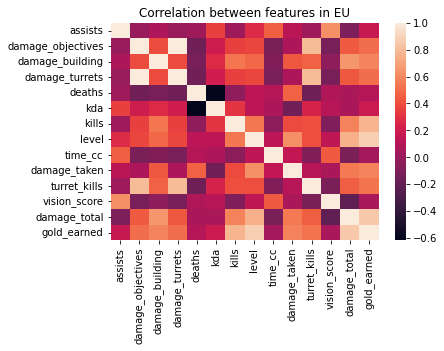

In [49]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = lol_data.corr()
sn.heatmap(corrMatrix)
plt.title("Correlation between features in EU")
plt.show()

Sort the correlated values.

In [50]:
corrPairs = corrMatrix.unstack()
sortedPairs = corrPairs.sort_values(kind="quicksort")

Print the stringly correlated features. We have taken 0.8 as a value to consider the strong correlation relationship between two different attributes.

In [51]:
strongPairs = sortedPairs[abs(sortedPairs) > 0.8]
print(strongPairs)

damage_total       gold_earned          0.851363
gold_earned        damage_total         0.851363
level              gold_earned          0.879200
gold_earned        level                0.879200
assists            assists              1.000000
vision_score       vision_score         1.000000
turret_kills       turret_kills         1.000000
damage_taken       damage_taken         1.000000
time_cc            time_cc              1.000000
level              level                1.000000
kills              kills                1.000000
kda                kda                  1.000000
deaths             deaths               1.000000
damage_turrets     damage_turrets       1.000000
                   damage_objectives    1.000000
damage_building    damage_building      1.000000
damage_objectives  damage_turrets       1.000000
                   damage_objectives    1.000000
damage_total       damage_total         1.000000
gold_earned        gold_earned          1.000000
dtype: float64


As we can see that "gold_earned" is highly correlated with "damage_total" and "level". We will be keeping only one column out of them. In our case, we have decided to consider only "gold_earned"

In [52]:
lol_data.drop(['damage_total','level'], axis=1, inplace=True)

Finding the number of null value cells in each column.

In [53]:
lol_data.isnull().sum()

side                 264
assists              308
damage_objectives    294
damage_building      264
damage_turrets       272
deaths               292
kda                  282
kills                277
time_cc              297
damage_taken         298
turret_kills         263
vision_score         280
gold_earned            0
role                   0
minions_killed         0
dtype: int64

To fill in the missing values in the numerical attributes, we have selected SimpleImputer class from sklearn. The missing values will be filled with median of that particular column.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# Creating a copy of data
lol_data_c = lol_data.copy()
# Dropping the categorical attributes as median can be calulated for numerical values only
lol_data_numerical = lol_data_c.drop(["side","role","minions_killed"],axis=1)
imputer.fit(lol_data_numerical)

SimpleImputer(strategy='median')

Transforming the original dataset to replace missing values with the calculated median of each numerical attribute.

In [55]:
X = imputer.transform(lol_data_numerical)
lol_data_tr_i = pd.DataFrame(X, columns=lol_data_numerical.columns,
                          index=lol_data_numerical.index)
lol_data_tr_i

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned
0,9.0,0.0,63.0,0.0,9.0,2.400000,1.0,39.0,17876.0,0.0,59.0,5933.0
1,7.0,4885.0,9190.0,4885.0,5.0,2.000000,3.0,26.0,17148.0,3.0,24.0,10168.0
2,13.0,1871.0,5755.0,1871.0,7.0,3.571429,12.0,34.0,26211.0,1.0,29.0,12038.0
3,6.0,0.0,4920.0,0.0,6.0,1.500000,3.0,21.0,22136.0,0.0,29.0,7570.0
4,2.0,0.0,0.0,0.0,3.0,1.000000,1.0,14.0,6680.0,0.0,20.0,4377.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5766,21.0,1020.0,3234.0,1020.0,4.0,6.000000,3.0,27.0,12157.0,1.0,86.0,7875.0
5767,10.0,2306.0,8305.0,2306.0,7.0,3.428571,14.0,5.0,28430.0,1.0,19.0,13741.0
5768,19.0,1552.0,2019.0,1552.0,8.0,2.625000,2.0,30.0,17652.0,1.0,67.0,8168.0
5769,0.0,4680.0,24114.0,4680.0,4.0,0.250000,1.0,6.0,18691.0,2.0,13.0,10808.0


The describe method used to find the variation in mean for different numerical features

In [56]:
#print(range(lol_data_tr_i.var().min(),lol_data_tr_i.var().max()))
lol_data_tr_i.describe()

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,8.189915,2604.288338,9253.418645,2609.885635,5.774736,3.565347,5.672847,18.734188,21401.341189,1.033963,29.879397,10861.608733
std,5.568789,3135.223577,9916.535118,3121.006756,2.957092,3.750087,4.222830,14.115114,9673.629565,1.276052,20.343566,3465.530001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2594.000000,0.000000,2.000000,3093.000000
25%,4.000000,454.000000,2256.500000,453.500000,4.000000,1.333333,2.000000,9.000000,14570.000000,0.000000,17.000000,8313.500000
50%,7.000000,1671.000000,5755.000000,1693.000000,6.000000,2.400000,5.000000,17.000000,19936.000000,1.000000,24.000000,10480.000000
75%,11.000000,3617.000000,13057.000000,3648.500000,8.000000,4.250000,8.000000,25.000000,26470.500000,2.000000,36.000000,13056.500000
max,41.000000,44162.000000,70006.000000,44162.000000,21.000000,33.000000,30.000000,259.000000,78861.000000,9.000000,174.000000,28566.000000


Since there is huge variation in the values of mean for different attributes, we will need to do a rescaling of the values so they all between 0 and 1.

In [57]:
from sklearn.preprocessing import MinMaxScaler
mScaler = MinMaxScaler()
imp_columns = lol_data_tr_i.columns
lol_data_tr = pd.DataFrame(mScaler.fit_transform(lol_data_tr_i), columns=imp_columns)

Now we can see that our data is scaled in a much better way.

In [58]:
lol_data_tr.describe()

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,0.199754,0.058971,0.132180,0.059098,0.274987,0.108041,0.189095,0.072333,0.246599,0.114885,0.162090,0.304974
std,0.135824,0.070994,0.141653,0.070672,0.140814,0.113639,0.140761,0.054499,0.126839,0.141784,0.118277,0.136047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.097561,0.010280,0.032233,0.010269,0.190476,0.040404,0.066667,0.034749,0.157027,0.000000,0.087209,0.204942
50%,0.170732,0.037838,0.082207,0.038336,0.285714,0.072727,0.166667,0.065637,0.227385,0.111111,0.127907,0.289993
75%,0.268293,0.081903,0.186513,0.082616,0.380952,0.128788,0.266667,0.096525,0.313065,0.222222,0.197674,0.391140
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Selecting the categorical features.

In [59]:
lol_data_cat = lol_data_c[["side","role","minions_killed"]]
lol_data_cat.head()

,side,role,minions_killed
0,Side.blue,Other,Few
1,Side.red,Other,Many
2,Side.blue,Other,Many
3,Side.red,TopLane_Jungle,Few
4,Side.blue,Other,Few


Performing the encoding of the categorical attributes. Refer below:

0 depicts "Other" role

1 depicts "TopLane_Jungle" role

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html



In [60]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
lol_data_encoded = ordinal_encoder.fit_transform(lol_data_cat)
df_tr = pd.DataFrame(lol_data_encoded, columns = ['side','role','minions_killed'], index=lol_data_c.index)
df_tr.reset_index(inplace=True,drop=True)
lol_data_semi = pd.concat([lol_data_tr,df_tr],axis=1)
lol_data_semi

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned,side,role,minions_killed
0,0.219512,0.000000,0.000900,0.000000,0.428571,0.072727,0.033333,0.150579,0.200375,0.000000,0.331395,0.111491,0.0,0.0,0.0
1,0.170732,0.110615,0.131274,0.110615,0.238095,0.060606,0.100000,0.100386,0.190830,0.333333,0.127907,0.277745,1.0,0.0,1.0
2,0.317073,0.042367,0.082207,0.042367,0.333333,0.108225,0.400000,0.131274,0.309662,0.111111,0.156977,0.351156,0.0,0.0,1.0
3,0.146341,0.000000,0.070280,0.000000,0.285714,0.045455,0.100000,0.081081,0.256231,0.000000,0.156977,0.175755,1.0,1.0,0.0
4,0.048780,0.000000,0.000000,0.000000,0.142857,0.030303,0.033333,0.054054,0.053575,0.000000,0.104651,0.050406,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,0.512195,0.023097,0.046196,0.023097,0.190476,0.181818,0.100000,0.104247,0.125388,0.111111,0.488372,0.187728,NaN,0.0,0.0
5767,0.243902,0.052217,0.118633,0.052217,0.333333,0.103896,0.466667,0.019305,0.338757,0.111111,0.098837,0.418011,1.0,1.0,0.0
5768,0.463415,0.035143,0.028840,0.035143,0.380952,0.079545,0.066667,0.115830,0.197438,0.111111,0.377907,0.199231,1.0,0.0,0.0
5769,0.000000,0.105973,0.344456,0.105973,0.190476,0.007576,0.033333,0.023166,0.211061,0.222222,0.063953,0.302870,1.0,1.0,1.0


Check again if there any columns which have missing values still present.

In [61]:
lol_data_semi.isna().sum()

assists                0
damage_objectives      0
damage_building        0
damage_turrets         0
deaths                 0
kda                    0
kills                  0
time_cc                0
damage_taken           0
turret_kills           0
vision_score           0
gold_earned            0
side                 264
role                   0
minions_killed         0
dtype: int64

Dropping the rows from the dataset which have NaN values in side column.

In [62]:
lol_data_final = lol_data_semi.copy()
lol_data_final.dropna(subset = ["side"], inplace=True)
lol_data_final.reset_index(drop=True)

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned,side,role,minions_killed
0,0.219512,0.000000,0.000900,0.000000,0.428571,0.072727,0.033333,0.150579,0.200375,0.000000,0.331395,0.111491,0.0,0.0,0.0
1,0.170732,0.110615,0.131274,0.110615,0.238095,0.060606,0.100000,0.100386,0.190830,0.333333,0.127907,0.277745,1.0,0.0,1.0
2,0.317073,0.042367,0.082207,0.042367,0.333333,0.108225,0.400000,0.131274,0.309662,0.111111,0.156977,0.351156,0.0,0.0,1.0
3,0.146341,0.000000,0.070280,0.000000,0.285714,0.045455,0.100000,0.081081,0.256231,0.000000,0.156977,0.175755,1.0,1.0,0.0
4,0.048780,0.000000,0.000000,0.000000,0.142857,0.030303,0.033333,0.054054,0.053575,0.000000,0.104651,0.050406,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,0.317073,0.130610,0.191798,0.130610,0.571429,0.050505,0.233333,0.065637,0.310173,0.111111,0.151163,0.481098,1.0,0.0,1.0
5503,0.243902,0.052217,0.118633,0.052217,0.333333,0.103896,0.466667,0.019305,0.338757,0.111111,0.098837,0.418011,1.0,1.0,0.0
5504,0.463415,0.035143,0.028840,0.035143,0.380952,0.079545,0.066667,0.115830,0.197438,0.111111,0.377907,0.199231,1.0,0.0,0.0
5505,0.000000,0.105973,0.344456,0.105973,0.190476,0.007576,0.033333,0.023166,0.211061,0.222222,0.063953,0.302870,1.0,1.0,1.0


**FEATURE FILTERING**

Perform the Feature filtering based on chi square test


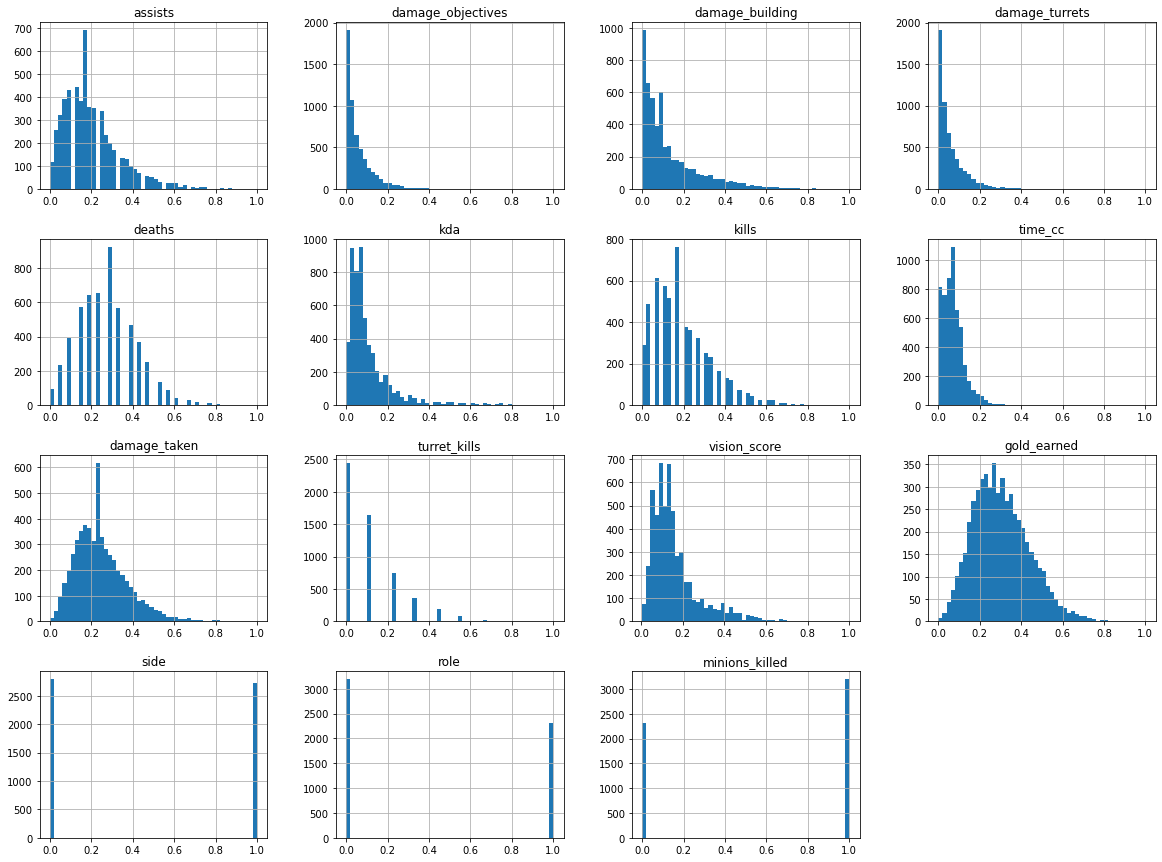

In [63]:
import matplotlib.pyplot as plt 
%matplotlib inline
lol_data_final.hist(bins=50, figsize=(20,15)) 
plt.show() 

Categorical attributes in dataset are as below:
* side
* minions_killed

In [64]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
ALPHA = 0.05
features = lol_data_final[['side','minions_killed']]
class_label = lol_data_final['role']

In [65]:
filtered_features = []

for feature in ('side','minions_killed'):
    cont_table = pd.crosstab(class_label, features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features)

Chi2 value for feature "side": 0.0857
Fail to reject the Null Hypothesis for feature "side", p-value 0.7697

Chi2 value for feature "minions_killed": 150.5155
Reject the Null Hypothesis for feature "minions_killed", p-value 0.0000

Feature set after filtering with Chi-square test: ['minions_killed']


Therefore, we will remove the "side" column from the dataset.

In [66]:
# Drop the "side" column as it is of not much importance
lol_data_final.drop("side", axis=1, inplace=True)

In [67]:
lol_data_final

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,time_cc,damage_taken,turret_kills,vision_score,gold_earned,role,minions_killed
0,0.219512,0.000000,0.000900,0.000000,0.428571,0.072727,0.033333,0.150579,0.200375,0.000000,0.331395,0.111491,0.0,0.0
1,0.170732,0.110615,0.131274,0.110615,0.238095,0.060606,0.100000,0.100386,0.190830,0.333333,0.127907,0.277745,0.0,1.0
2,0.317073,0.042367,0.082207,0.042367,0.333333,0.108225,0.400000,0.131274,0.309662,0.111111,0.156977,0.351156,0.0,1.0
3,0.146341,0.000000,0.070280,0.000000,0.285714,0.045455,0.100000,0.081081,0.256231,0.000000,0.156977,0.175755,1.0,0.0
4,0.048780,0.000000,0.000000,0.000000,0.142857,0.030303,0.033333,0.054054,0.053575,0.000000,0.104651,0.050406,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,0.317073,0.130610,0.191798,0.130610,0.571429,0.050505,0.233333,0.065637,0.310173,0.111111,0.151163,0.481098,0.0,1.0
5767,0.243902,0.052217,0.118633,0.052217,0.333333,0.103896,0.466667,0.019305,0.338757,0.111111,0.098837,0.418011,1.0,0.0
5768,0.463415,0.035143,0.028840,0.035143,0.380952,0.079545,0.066667,0.115830,0.197438,0.111111,0.377907,0.199231,0.0,0.0
5769,0.000000,0.105973,0.344456,0.105973,0.190476,0.007576,0.033333,0.023166,0.211061,0.222222,0.063953,0.302870,1.0,1.0


**TRAIN AND TEST DATA SPLIT**

We will perform the random split first of the data to train and test data. Then perform the stratified sampling based split of the dataset into training and test data. Next, is the calulation of the error observed in the sampling when performed randomly and stratified.

Performing a random split of the dataset. 

In [68]:
from sklearn.model_selection import train_test_split
lol_train_set_random, lol_test_set_random = train_test_split(lol_data_final, test_size=0.2, random_state=42)

Performing a stratified sampling based split of the dataset.

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit
split_lol = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for lol_train_index, lol_test_index in split_lol.split(lol_data_final, lol_data_final["role"]):
    lol_train_set = lol_data_final.iloc[lol_train_index]
    lol_test_set = lol_data_final.iloc[lol_test_index]

Calcuate the proportion of the instances with label "Other" and "TopLane_Jungle" in overall data and that in the random and stratified sampling based. We can observe from the table below that number of samples taken with stratified have both role "Other" and "TopLane_Jungle" in same proportion as the overall dataset.

In [70]:
def role_proportions(data):
    return data["role"].value_counts() / len(data)

role_comparison = pd.DataFrame({
    "Overall": role_proportions(lol_data_final),
    "Stratified": role_proportions(lol_test_set),
    "Random": role_proportions(lol_test_set_random)
}).sort_index()
role_comparison["Random %error"] = 100 * role_comparison["Random"]/role_comparison["Overall"] - 100
role_comparison["Stratified %error"] = 100 * role_comparison["Stratified"]/role_comparison["Overall"] - 100

role_comparison

,Overall,Stratified,Random,Random %error,Stratified %error
0.0,0.579081,0.578947,0.600726,3.737781,-0.023106
1.0,0.420919,0.421053,0.399274,-5.142270,0.031788


Fetch the target attribute from both the training and test data. 

In [71]:
y_train = lol_train_set["role"]
y_test = lol_test_set["role"]

Dropping the "role" column from the training and test data as this is the target attribute.

In [72]:
for set_ in (lol_train_set, lol_test_set):
    set_.drop("role", axis=1, inplace=True)

/tmp/ipykernel_50/3912190937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("role", axis=1, inplace=True)
/tmp/ipykernel_50/3912190937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("role", axis=1, inplace=True)


**K-NN classification**

In [73]:
y_train_L = y_train.replace(to_replace = [0, 1], value = ['Other', 'TopLane_Jungle'])
y_test_L = y_test.replace(to_replace = [0, 1], value = ['Other', 'TopLane_Jungle'])

In [74]:
y_train_L

4566    TopLane_Jungle
5572             Other
1614    TopLane_Jungle
1755             Other
5640             Other
             ...      
5411             Other
4072             Other
1088             Other
1453             Other
4633    TopLane_Jungle
Name: role, Length: 4405, dtype: object

In [75]:
y_test_L

2099             Other
4546             Other
4098             Other
3037             Other
3216    TopLane_Jungle
             ...      
3838    TopLane_Jungle
2747             Other
3542             Other
5266    TopLane_Jungle
4169    TopLane_Jungle
Name: role, Length: 1102, dtype: object

Import all the necessary modules.

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Performing a test to determine the correct number of neighbors to consider in the KNN nearest neigbor algorithm.

Performance metrics for 3-nearest neigbor
Accuracy: 0.8148820326678766
Recall: 0.7435344827586207
Precision: 0.8023255813953488
F1: 0.7718120805369127
#########################
Performance metrics for 4-nearest neigbor
Accuracy: 0.822141560798548
Recall: 0.665948275862069
Precision: 0.8828571428571429
F1: 0.7592137592137591
#########################
Performance metrics for 5-nearest neigbor
Accuracy: 0.8357531760435571
Recall: 0.7586206896551724
Precision: 0.836104513064133
F1: 0.7954802259887007
#########################
Performance metrics for 6-nearest neigbor
Accuracy: 0.8330308529945554
Recall: 0.6982758620689655
Precision: 0.8804347826086957
F1: 0.7788461538461539
#########################


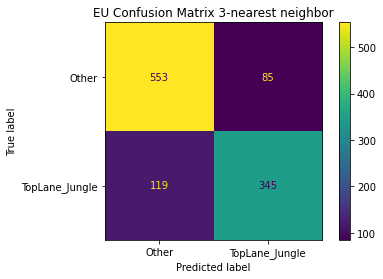

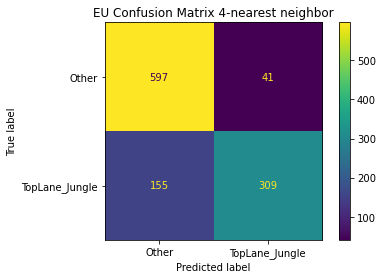

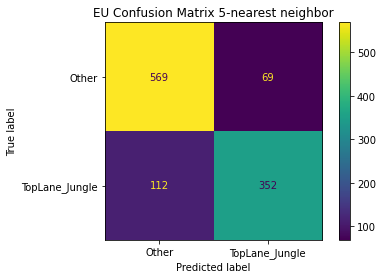

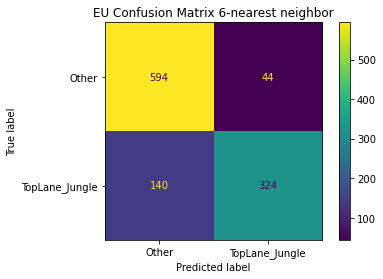

In [77]:
for n in range(3,7): #3,7
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(lol_train_set, y_train_L)
    # Note that we're calculating the accuracy score for the test data
    y_pred = knn.predict(lol_test_set)
    accuracy = knn.score(lol_test_set, y_test_L)
    print('Performance metrics for {0}-nearest neigbor'.format(n))
    print('Accuracy:',accuracy)
    print('Recall:', recall_score(y_test_L, y_pred, pos_label='TopLane_Jungle'))
    print('Precision:', precision_score(y_test_L, y_pred,pos_label='TopLane_Jungle'))
    print('F1:', f1_score(y_test_L, y_pred,pos_label='TopLane_Jungle'))
    # cm = confusion matrix (variable name)
    cm = confusion_matrix(y_test_L, # test data
                      y_pred, # predictions
                      labels=['Other','TopLane_Jungle'] # class labels from the knn model
                     )

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=['Other','TopLane_Jungle'] # class labels from the knn model 
                             )

    disp.plot()
    plt.title("EU Confusion Matrix {0}-nearest neighbor".format(n))
    plt.show()
    print("#########################")

As F1 score for the 5 nearest neigbor is highest, we will consider 5 as the number of nearest neighbor based classification algorithm. 

We will perform the cross-validation next to check if we can get more good F1 score.

Now calculating the accuracy with cross-validation

In [78]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

**CROSS VALIDATION**

Performing a test below to determin the correct value for the number of folds. We have selected stratified based k fold cross validation to avoid any bias in the dataset.


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html


In [79]:
for f in range(5,11):
    k = f
    split_num = 0
    skf_CV = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    #kf_CV = KFold(n_splits=k, shuffle=True, random_state=42)
    results = []
    X = lol_train_set.copy()
    y = y_train_L.copy()
    X.reset_index(drop=True,inplace=True)
    y.reset_index(drop=True,inplace=True) 
    for train_idx, test_idx in skf_CV.split(X,y): 
        # train-test split
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
        # # Training
        knn_cv = KNN(n_neighbors=5)
        knn_cv.fit(X_train_cv, y_train_cv)    
        # # Predictions
        y_pred_cv = knn_cv.predict(X_test_cv)
        results.append(accuracy_score(y_test_cv, y_pred_cv))
    print('Average Accuracy - {0}-Fold Cross-Validation:{1}'.format(k,np.mean(results)))

Average Accuracy - 5-Fold Cross-Validation:0.8102156640181611
Average Accuracy - 6-Fold Cross-Validation:0.8154423622309959
Average Accuracy - 7-Fold Cross-Validation:0.8140813081989552
Average Accuracy - 8-Fold Cross-Validation:0.819063685860419
Average Accuracy - 9-Fold Cross-Validation:0.8168018400270811
Average Accuracy - 10-Fold Cross-Validation:0.8195263863121006


Selecting 10 Fold Cross Validation to evaluate the model as it provides the highest accuracy.

In [80]:
k = 10
split_num = 0
skf_CV = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
#kf_CV = KFold(n_splits=k, shuffle=True, random_state=42)
results = []
X = lol_train_set.copy()
y = y_train_L.copy()
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True) 
for train_idx, test_idx in skf_CV.split(X,y): 
    # train-test split
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    # # Training
    knn_cv = KNN(n_neighbors=5)
    knn_cv.fit(X_train_cv, y_train_cv)    
    # # Predictions
    y_pred_cv = knn_cv.predict(X_test_cv)
    results.append(accuracy_score(y_test_cv, y_pred_cv))
print('Average Accuracy - {0}-Fold Cross-Validation:{1}'.format(k,np.mean(results)))

Average Accuracy - 10-Fold Cross-Validation:0.8195263863121006


EU Performance metrics for -nearest neighbours
Accuracy: 0.8330308529945554
Recall: 0.7478448275862069
Precision: 0.8381642512077294
F1: 0.7904328018223234
#########################


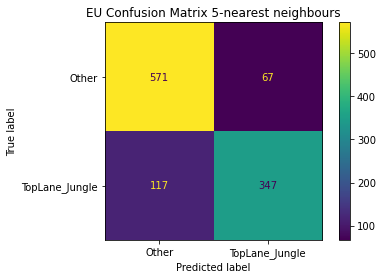

In [81]:
y_pred_new = knn_cv.predict(lol_test_set)
print('EU Performance metrics for -nearest neighbours')
print('Accuracy:', accuracy_score(y_test_L, y_pred_new))
print('Recall:', recall_score(y_test_L, y_pred_new, pos_label='TopLane_Jungle'))
print('Precision:', precision_score(y_test_L, y_pred_new,pos_label='TopLane_Jungle'))
print('F1:', f1_score(y_test_L, y_pred_new,pos_label='TopLane_Jungle'))
cm = confusion_matrix(y_test_L, # test data
              y_pred_new, # predictions
              labels=['Other','TopLane_Jungle'] # class labels from the knn model
             )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                            display_labels=['Other','TopLane_Jungle'] # class labels from the knn model 
                            )
disp.plot()
plt.title("EU Confusion Matrix 5-nearest neighbours")
plt.show()
print("#########################")